<a href="https://colab.research.google.com/github/sayan0506/Deep-Neural-Network-with-Pytorch-/blob/main/Pytorch_for_Deep_Learning_Course(Img_Classification_using_logistic_reg).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using pytorch
In this module we will use logistic regression for image classifcation using MNIST dataset for classifying digits

In [1]:
import torch
# torchvision is the module that contains some utilities to work with image data in pytorch
import torchvision
# torchvision has standard dataset MNIST 
from torchvision.datasets import MNIST 

In [2]:
# this is classsification problem
# as we are trying to classify what category of data the input falls into
data = MNIST(root = '/content/data', download = True)
# when we pass download = True it tells to the class thta, if the data is not present in the root folder passed
# then, download it else don't download
# from folder we can see train_data downloaded as train gz file, similarly train, test img an labels are downloaded  

Extracting /content/data/MNIST/raw/train-images-idx3-ubyte.gz to /content/data/MNIST/raw


Extracting /content/data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/data/MNIST/raw



Extracting /content/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/data/MNIST/raw


Extracting /content/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
len(data)

60000

In [4]:
# let's download test images
test_dataset = MNIST(root = '/content/data', download = True, train=False)

In [5]:
# let us look sample images fom train set
data[0]
# each element of data contains the PIL.image.image(PIL = Python Imaging Library)
# and the label of the image
# each image of the shape (28, 28)

(<PIL.Image.Image image mode=L size=28x28 at 0x7FF6A6ED70B8>, 5)

In [6]:
import matplotlib.pyplot as plt


5


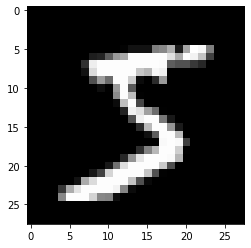

In [7]:
# now visualize the images and labels from dataset
image, label = data[0]
plt.imshow(image, cmap = 'gray')
print(label)

In [8]:
# we need to convert images with tensors, so that pytorch can work with those
import torchvision.transforms as transform

In [65]:
# so while loading images we will aply the transform
from torchvision.datasets import MNIST

In [66]:
# loading the datasets with transform
dataset = MNIST(root = '/content/data/MNIST_T',train = True, transform = transform.ToTensor(), download = True)

In [67]:
print(type(dataset[0][1]))
print(type(dataset[0][0]))

<class 'int'>
<class 'torch.Tensor'>


In [12]:
# so whenever the MNIST is instantiated. dataset consists of list of 60,000 images, and 
# each element consists of image tensor, and int i.e image label
img_tensor, label = dataset[0]
print(img_tensor.shape)
# here 1st dimension is the channel size, nh = 28, nw = 28 


torch.Size([1, 28, 28])


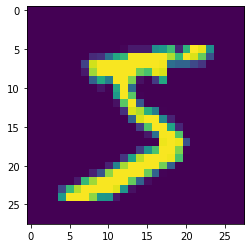

In [13]:
# let's look an image sample
plt.imshow(img_tensor.reshape(28,28))

# Training and Validation set

In [84]:
# let us split the dataset into train and validation set
import numpy as np

# split indics takes length of dataset and validation percentage attribute
def split_indices(n, val_pct):

  # determind size of validation set
  n_val = int(val_pct * n)
  # create random permutation between 0 to n-1
  indxs = np.random.permutation(n)
  # now split indices
  # pichk 1st n_val for validation set
  return indxs[n_val:], indxs[:n_val]

In [85]:
# we finally get indices corresponds to train and validation splits
split_indices(len(dataset), 0.10)

(array([ 6017, 58179, 33261, ..., 19334, 24681, 19675]),
 array([52100,  8702, 25976, ..., 21090,  9872, 28787]))

In [86]:
train_indices, validation_indices = split_indices(len(dataset), val_pct = 0.2)

In [87]:
# size of train and validation set
print(len(train_indices), len(validation_indices))

48000 12000


In [88]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [89]:
batch_size = 100

# Samples elements randomly from a given list of indices, without replacement
# subsequent random sapler ensures that, sampling wil be done based on indices passed in the train_samples 
# training sampler and dataloader
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset, batch_size= batch_size, sampler = train_sampler)

# validation sampler and dataloader
validation_sampler = SubsetRandomSampler(validation_indices)
validation_dl = DataLoader(dataset, batch_size= batch_size, sampler = train_sampler)

In [90]:
# so. the train_dl consist of 480 mini batches of data
print(len(train_dl))
print(len(validation_dl))

480
480


In [91]:
# the above described procedure can simply donw by single line of code random_Split
from torch.utils.data import random_split

In [92]:
validation_pct = 0.2
batch_size = 128
# in random_split we pass the dataset, then pass the train and validation set lengths as a list of two elements 
train_ds, validation_ds = random_split(dataset, [int(len(dataset)*(1-validation_pct)), int(len(dataset)*validation_pct)])

In [94]:
from torch.utils.data.dataloader import DataLoader

# now we create dataloaders using the dataset
train_dl = DataLoader(train_ds, shuffle = True, batch_size= batch_size)
validation_dl = DataLoader(validation_ds, shuffle = True, batch_size= batch_size)


In [95]:
len(train_dl)

375

# Building the Model

In [96]:
# we are building the logistic regression
from torch import nn

input_size = 28 * 28
num_classes = 10

# model
model = nn.Linear(input_size, num_classes)

In [97]:
model.weight.shape

torch.Size([10, 784])

In [98]:
model.bias.shape

torch.Size([10])

In [99]:
# let use predict labels using the untrained images
for images, labels in train_dl:
  print(labels)
  print(model(images))

# so size mismatch, so we need to reshape images before passing into the model

tensor([8, 4, 9, 6, 9, 0, 5, 0, 6, 4, 1, 5, 8, 2, 0, 6, 1, 9, 6, 6, 9, 5, 3, 3,
        4, 9, 3, 0, 5, 2, 3, 1, 4, 2, 1, 8, 5, 7, 5, 1, 0, 6, 5, 0, 4, 3, 5, 0,
        0, 7, 4, 7, 1, 8, 4, 0, 3, 2, 4, 7, 3, 5, 6, 3, 2, 3, 9, 0, 9, 1, 0, 2,
        5, 4, 9, 6, 5, 1, 5, 7, 9, 8, 4, 9, 3, 3, 1, 5, 6, 5, 0, 3, 8, 5, 3, 2,
        9, 6, 3, 2, 5, 1, 6, 7, 3, 0, 7, 9, 8, 1, 5, 7, 3, 1, 6, 5, 5, 2, 0, 1,
        7, 6, 6, 0, 1, 7, 5, 2])


RuntimeError: ignored

In [100]:
# creating a custom model class
?nn.Module

In [101]:
class mult(object):
  def ___init__(self):
    self.n = 2
    print(self.n)
    

  def forward(self,n):
    #print(self.n)
    return n ** 2


  def __call__(self,n):
    c = self.forward(n)
    return c

m = mult()
print(m(2))
# this is the way the fowrward function becomes a callable one

4


In [102]:
# create custom model for implementing the linear regression
class MNIST(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)
  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    preds = self.linear(xb)
    return preds

# we have done super.__init__()
# as inside constructor of the super class nn.Module the forward class waas made to be callable
# as MNISt inherits from nn.Module, thus MNIST object beomes callable with the functionality of forward class

In [103]:
class mult(object):
  def ___init__(self):
    sn = forward(2)
    print(sn)

  def forward(self, n):
    self.n = n
    print('digit',self.n)
    return self.n
m = mult()
print('called:',m.forward(2))

digit 2
called: 2


In [104]:
# let us create an object of the custom logistic regression model
model = MNIST()
for images, labels in train_dl:
  outputs = model(images)
  break

In [105]:
print(outputs)

tensor([[ 0.1828, -0.1713,  0.1949,  ...,  0.0699, -0.0189,  0.0969],
        [-0.2073, -0.1231,  0.3746,  ..., -0.0708, -0.0240,  0.0619],
        [ 0.1279, -0.0381, -0.0290,  ...,  0.0846, -0.0032,  0.0749],
        ...,
        [ 0.3032,  0.2500, -0.0994,  ...,  0.0212, -0.0891,  0.0094],
        [-0.0119,  0.0334,  0.0312,  ...,  0.2194, -0.2466, -0.1131],
        [ 0.0385,  0.2139, -0.1818,  ..., -0.0009, -0.1299, -0.0137]],
       grad_fn=<AddmmBackward>)


In [106]:
# itreturns outputs for the 1st batch
len(outputs)
# we see the outputs are different number, if we want the predictions of all ten outputs are added to 1

128

In [107]:
# if we want outputs are predicted sum = 1, which means these 10 events together make copmplete prediction
#then ew need to use the default softmax function
import torch.nn.functional as F

In [108]:
# apply softmax to output layer
# dim = 1, specifies the axis along which the softmax will be computed( axis = 1 for row-wise)
probs = F.softmax(outputs, dim = 1)

In [109]:
len(probs)

128

In [110]:
# to access the value of the predicted element
print(probs[0][0].item())

0.11600590497255325


In [111]:
# let's check sum of all the probabilities
print(torch.sum(probs[0]))

tensor(1., grad_fn=<SumBackward0>)


In [112]:
# let's take the index of max probability for each row
max_prob, preds = torch.max(probs, dim = 1)
print(max_prob[0].item(), preds[0].item())
print(probs[0])
# we can say max_prob defines the recognized digit for that particular image

0.117410808801651 2
tensor([0.1160, 0.0814, 0.1174, 0.0824, 0.1105, 0.0752, 0.1122, 0.1036, 0.0948,
        0.1065], grad_fn=<SelectBackward>)


In [113]:
print(len(labels),len(preds))

128 128


# Cross_entropy for Loss calculation

A commonly used loss function for classification problems is the cross entropy, which has the following formula:

**loss = -(sum(y * log(yhat)) for all datapoints in the minisbatches**
yhat = [1st prob,..., 10th prob](we also call it logits scores)

y = [1st label, ....., 10th prob](all equal =, correct label = 1)
ex: if any digit is 5, then
y = [0,0,0,0,1,0,0,0,0,0]
(we pass a single label as integer,

**Thus, this one hot encoding of labels are done by the cross_entropy function** 

In [114]:
# for this kind of categorical data, where all the predictions add upto 1, then
loss_fn = F.cross_entropy

In [115]:
loss = loss_fn(probs, labels)

In [116]:
print(loss)

tensor(2.3075, grad_fn=<NllLossBackward>)


In [117]:
labels

tensor([3, 5, 1, 1, 5, 3, 2, 0, 5, 0, 1, 3, 2, 5, 8, 2, 2, 3, 1, 6, 2, 9, 1, 7,
        7, 8, 9, 8, 8, 6, 4, 7, 8, 0, 2, 1, 5, 0, 7, 9, 5, 4, 4, 1, 5, 4, 3, 3,
        0, 4, 9, 8, 9, 0, 8, 7, 3, 4, 3, 8, 0, 8, 4, 2, 3, 2, 1, 5, 1, 8, 2, 5,
        6, 5, 7, 5, 3, 0, 9, 5, 9, 4, 6, 0, 6, 9, 0, 5, 0, 2, 5, 4, 7, 3, 8, 2,
        8, 7, 5, 1, 0, 7, 6, 0, 1, 1, 6, 1, 5, 0, 5, 9, 4, 8, 3, 1, 0, 8, 8, 5,
        1, 2, 6, 1, 5, 7, 6, 7])

In [118]:
len(labels)

128

In [122]:
print(probs)

tensor([[0.1160, 0.0814, 0.1174,  ..., 0.1036, 0.0948, 0.1065],
        [0.0779, 0.0848, 0.1395,  ..., 0.0893, 0.0936, 0.1020],
        [0.1140, 0.0966, 0.0974,  ..., 0.1092, 0.1000, 0.1081],
        ...,
        [0.1308, 0.1240, 0.0875,  ..., 0.0987, 0.0884, 0.0975],
        [0.0945, 0.0988, 0.0986,  ..., 0.1190, 0.0747, 0.0854],
        [0.1080, 0.1287, 0.0867,  ..., 0.1039, 0.0913, 0.1025]],
       grad_fn=<SoftmaxBackward>)


# Evaluation Metric and Loss function

In [129]:
# torch.sum(pr == labels).item() returns the sum of results of correct predictions(1 for correct, 0 for incorrect)
def accuracy(probs, labels):
  _, pr = torch.max(probs, dim = 1)
  return torch.sum(pr == labels).item()/len(pr)

In [128]:
accuracy(probs, labels)

0.046875

# Training the Model

In [131]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear == nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out
  
  def training_step(self, batch):
    images, labels = batch_size
    out = self(images)                     # Generate predictions
    loss = F.cross_entropy(out, labels)    # Calculate loss
    return loss

  def validation_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    acc = accuracy(out, labels)                # Calculate accuracy
    return {'val_loss': loss, 'val_acc':acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    # Concatenates sequence of tensors along a new dimension.
    epoch_loss = torch.stack(batch_losses).mean()       # Combine losses
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()          # Combine accuracies
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

  def epoch_end(self, epoch, result):
    print('Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}'.format(epoch, result['val_loss'], result['val_acc']))

